In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("Tournament.csv")
print(df.shape)
print(df.info())

(12, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours           12 non-null     float64
 1   Scores          12 non-null     int64  
 2   Winning status  12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes
None


In [ ]:
print(df.head(10))

   Hours  Scores  Winning status
0    2.5      56               0
1    6.0      23               0
2    6.0      12               0
3    5.9      15               1
4    1.3      67               0
5    4.5      45               1
6    9.2      78               1
7    2.3      90               0
8    1.3      25               1
9    3.1      56               0


12
90


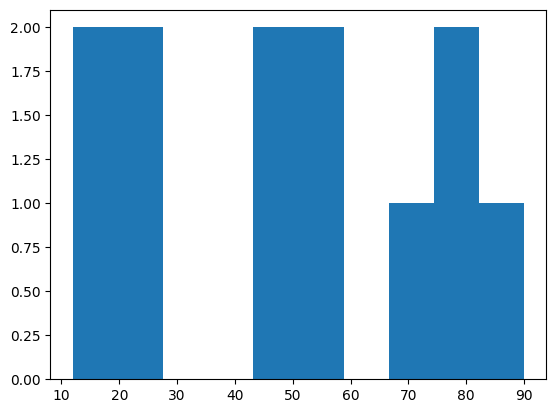

In [ ]:
print(df['Scores'].min())
print(df['Scores'].max())
plt.hist(df['Scores'])
plt.show()

Draw Scatter Plot

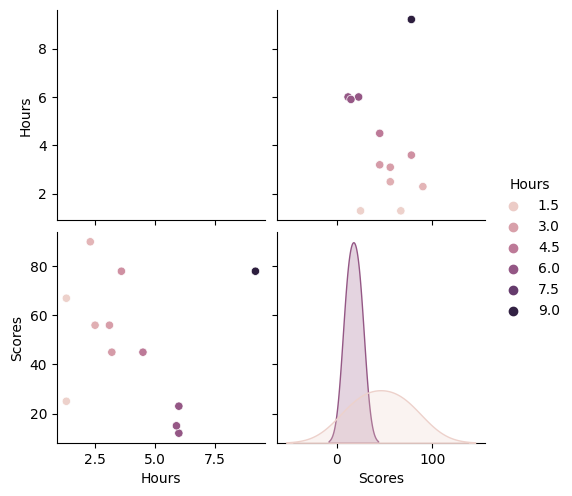

In [ ]:
sb.pairplot(df,vars=['Hours','Scores'],hue='Hours')
#vars=['X','Y']

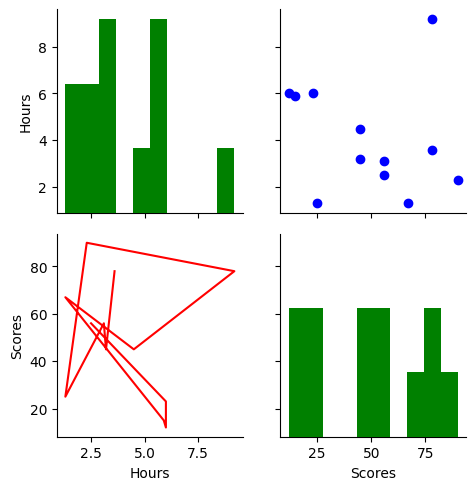

In [ ]:
g=sb.PairGrid(data=df,vars=['Hours','Scores'])
g.map_upper(plt.scatter,color='blue')
g.map_lower(plt.plot,color='red')
g.map_diag(plt.hist,color='green')

                   Hours    Scores  Winning status
Hours           1.000000 -0.178500        0.311399
Scores         -0.178500  1.000000       -0.032477
Winning status  0.311399 -0.032477        1.000000


<Axes: >

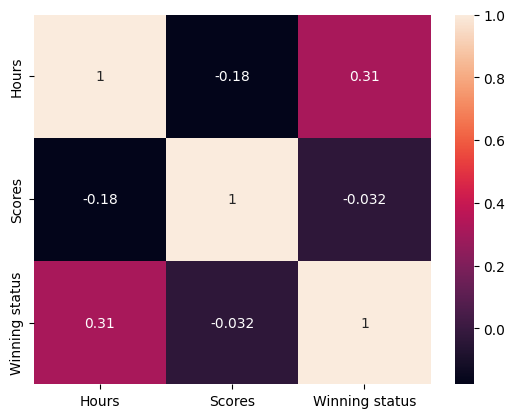

In [ ]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [ ]:
df.isnull().sum()

Hours             0
Scores            0
Winning status    0
dtype: int64

In [ ]:
df.head(20)
df

,Hours,Scores,Winning status
0,2.5,56,0
1,6.0,23,0
2,6.0,12,0
3,5.9,15,1
4,1.3,67,0
5,4.5,45,1
6,9.2,78,1
7,2.3,90,0
8,1.3,25,1
9,3.1,56,0


In [ ]:
df.isnull().sum()
target=(df['Scores'].mean())
print(target)
df.fillna(df['Scores'].mean(),inplace=True)
df.isnull().sum()

49.166666666666664


Hours             0
Scores            0
Winning status    0
dtype: int64

In [ ]:
print(df[(df['Hours']==1)].count())

Hours             0
Scores            0
Winning status    0
dtype: int64


In [ ]:
target=(df['Scores'].mean())
print(target)
df['Scores']=target
print(df['Scores'].isnull().sum())

49.166666666666664
0


In [ ]:
df.fillna(df['Scores'].mean(),inplace = True)
df.isnull().sum()

Hours             0
Scores            0
Winning status    0
dtype: int64

In [ ]:
print(df.columns)
print(df.shape)

Index(['Hours', 'Scores', 'Winning status'], dtype='object')
(12, 3)


Input and Output Splitting

In [ ]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
df2=df.values
print(df2)
train_x=(df2[:,0:12])
train_y=df2[:,0:2]
print(train_x.shape)
print(train_y.shape)

[[ 2.5        49.16666667  0.        ]
 [ 6.         49.16666667  0.        ]
 [ 6.         49.16666667  0.        ]
 [ 5.9        49.16666667  1.        ]
 [ 1.3        49.16666667  0.        ]
 [ 4.5        49.16666667  1.        ]
 [ 9.2        49.16666667  1.        ]
 [ 2.3        49.16666667  0.        ]
 [ 1.3        49.16666667  1.        ]
 [ 3.1        49.16666667  0.        ]
 [ 3.2        49.16666667  0.        ]
 [ 3.6        49.16666667  1.        ]]
(12, 3)
(12, 2)


MinMax Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
train_x=ms.fit_transform(train_x)

Regression Line Fitting

In [ ]:
regress.fit(train_x,train_y)
#The coefficents y=m0x0+m1x1+...+m11x11+c
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

Coefficients: [[7.90000000e+00 0.00000000e+00 1.07285884e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
Intercept: [ 1.3        49.16666667]


Prediction

In [ ]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])

[ 2.5        49.16666667] [ 2.5        49.16666667]
[ 6.         49.16666667] [ 6.         49.16666667]
[ 6.         49.16666667] [ 6.         49.16666667]
[ 5.9        49.16666667] [ 5.9        49.16666667]
[ 1.3        49.16666667] [ 1.3        49.16666667]
[ 4.5        49.16666667] [ 4.5        49.16666667]
[ 9.2        49.16666667] [ 9.2        49.16666667]
[ 2.3        49.16666667] [ 2.3        49.16666667]
[ 1.3        49.16666667] [ 1.3        49.16666667]
[ 3.1        49.16666667] [ 3.1        49.16666667]
[ 3.2        49.16666667] [ 3.2        49.16666667]
[ 3.6        49.16666667] [ 3.6        49.16666667]


Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(train_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(train_y,y_predicted)))

Mean Absolute error  3.700743415417188e-17
Mean Squared error  1.232595164407831e-32
Root Mean Squared error  1.1102230246251565e-16
